# House Prize Prediction(Regression Problem)


# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import  warnings
warnings.filterwarnings(action='ignore')

# Reading File

In [ ]:
df=pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Basic Operations

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [ ]:
df.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8403,-118.37,33.94,29.0,2265.0,813.0,3425.0,781.0,2.3675,149400.0,<1H OCEAN


In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
df.shape

(20640, 10)

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [ ]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [ ]:
df.isnull().mean()*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

# Visualization

In [1]:
_=sns.countplot(df['ocean_proximity'])
plt.xlabel('Ocean Proximity')
plt.title('Count Plot of Ocean Proximity')
plt.show()

NameError: ignored

In [ ]:
num_col=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_house_value','median_income']
for i in num_col:
    sns.distplot(df[i])
    plt.xlabel(i)
    plt.ylabel(None)
    plt.title('Distribution Plot of ' + i)
    plt.show()

# Handeling Missing Data

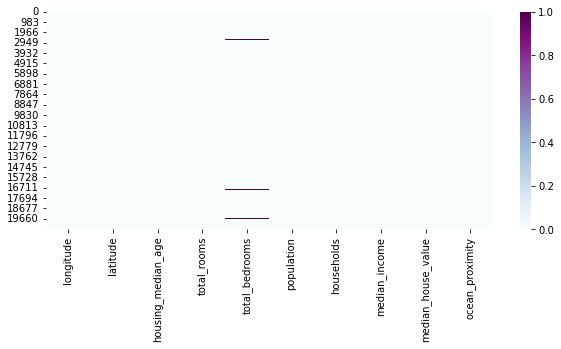

In [ ]:
plt.figure(figsize=(10,4))
_=sns.heatmap(df.isna(),cbar=True,cmap='BuPu')

In [ ]:
df.isnull().mean()*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [ ]:
df.fillna(value={'total_bedrooms':df['total_bedrooms'].mean()},inplace=True)

# After Missing Value Imputations

In [ ]:
df.isnull().mean()*100

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64

# Catagorical to Numerical

In [ ]:
df=pd.get_dummies(df,drop_first=True)

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1,0,0,0


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
df.shape

(20640, 13)

# Handeling Highly corelated data

Text(0.5, 1.0, 'Corelation Heatmap')

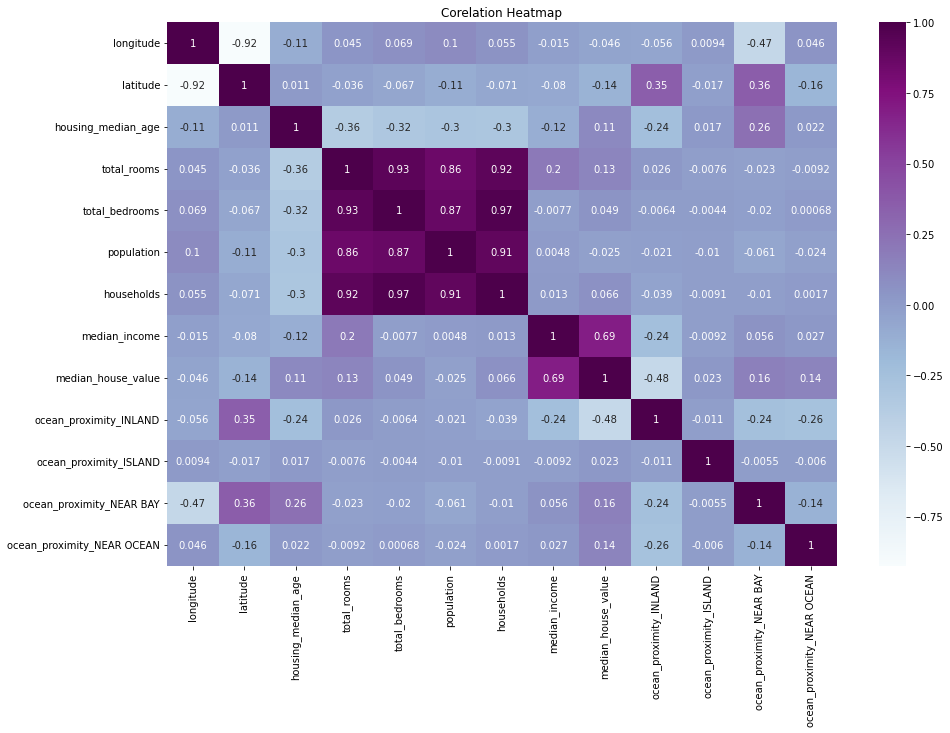

In [ ]:
plt.figure(figsize=(15,10))
_=sns.heatmap(df.corr(),annot=True,cmap="BuPu")
plt.title('Corelation Heatmap')

In [ ]:
df.drop(['total_bedrooms','population','households'],axis=1,inplace=True) 

Text(0.5, 1.0, 'Corelation Heatmap')

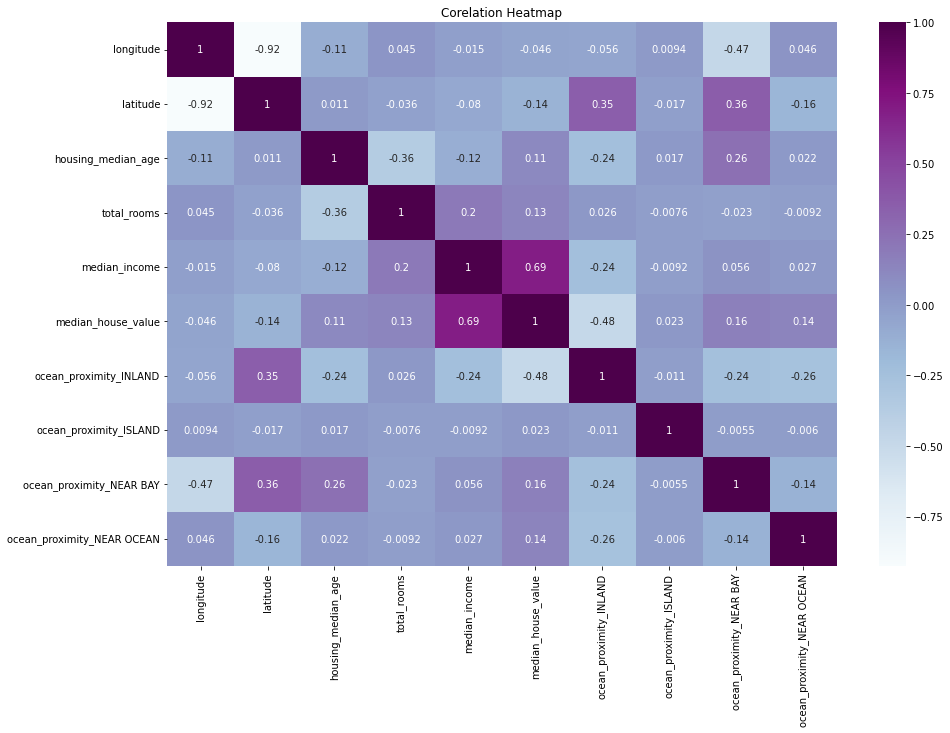

In [ ]:
plt.figure(figsize=(15,10))
_=sns.heatmap(df.corr(),annot=True,cmap="BuPu")
plt.title('Corelation Heatmap')

# Split in x and y

In [ ]:
x =df.drop(['median_house_value'],axis=1)
y = df['median_house_value']

In [ ]:
len(x.columns)

9

In [ ]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# ANN

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
ann_reg=Sequential()

In [ ]:
ann_reg.add(Dense(activation='relu',input_dim=9,units=6,kernel_initializer='normal'))

In [ ]:
#ann_reg.add(Dense(activation='relu',units=6,kernel_initializer='normal'))

In [ ]:
ann_reg.add(Dense(activation='relu',units=1,kernel_initializer='normal'))

In [ ]:
ann_reg.compile(optimizer='adam',loss='mse',metrics=['mae'])

# Model Summary

In [ ]:
ann_reg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 60        
                                                                 
 dense_4 (Dense)             (None, 1)                 7         
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


# Model Training

In [ ]:
ann_reg.fit(x_train,y_train,validation_split=0.33,batch_size=32,epochs=20)

Epoch 1/20
346/346 [==============================] - 2s 3ms/step - loss: 56590028800.0000 - mae: 207435.5000 - val_loss: 55819116544.0000 - val_mae: 206869.5000
Epoch 2/20
346/346 [==============================] - 1s 3ms/step - loss: 56587993088.0000 - mae: 207431.4531 - val_loss: 55815966720.0000 - val_mae: 206863.5469
Epoch 3/20
346/346 [==============================] - 1s 3ms/step - loss: 56583553024.0000 - mae: 207423.3594 - val_loss: 55810093056.0000 - val_mae: 206852.6250
Epoch 4/20
346/346 [==============================] - 1s 3ms/step - loss: 56576684032.0000 - mae: 207410.7969 - val_loss: 55801790464.0000 - val_mae: 206837.4062
Epoch 5/20
346/346 [==============================] - 1s 3ms/step - loss: 56566665216.0000 - mae: 207392.6094 - val_loss: 55790100480.0000 - val_mae: 206815.7656
Epoch 6/20
346/346 [==============================] - 1s 3ms/step - loss: 56553971712.0000 - mae: 207369.3750 - val_loss: 55776358400.0000 - val_mae: 206790.4688
Epoch 7/20
346/346 [========

In [ ]:
y_pred=ann_reg.predict(x_test)
y_pred

129/129 [==============================] - 0s 2ms/step


array([[1523.8951  ],
       [1153.2126  ],
       [  90.06439 ],
       ...,
       [  32.510757],
       [ 180.30417 ],
       [ 918.52106 ]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
mean_squared_error(y_test,y_pred)

55179222541.22626

In [ ]:
mean_absolute_error(y_test,y_pred)

205279.50096899224

In [ ]:
'''def root_mean_square(x,y):
    from sklearn.metrics import mean_squared_error
    print( pow( mean_squared_error(x,y),0.5))
root_mean_square(y_test,y_pred)'''

'def root_mean_square(x,y):\n    from sklearn.metrics import mean_squared_error\n    print( pow( mean_squared_error(x,y),0.5))\nroot_mean_square(y_test,y_pred)'

In [ ]:
# regression accuracy score
from sklearn import metrics
r_square_value=metrics.r2_score(y_test,y_pred)

In [ ]:
r_square_value

-3.202125657261246